# Import Lib

In [1]:
# Basic
import numpy as np
import pandas as pd

# Visalizaton
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprosessing
from datetime import date
import holidays

# Models
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Ensemble
from sklearn.ensemble import VotingRegressor
# Cross-validation
from sklearn.model_selection import cross_val_score

# Ignore warings
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Import Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine=[train,test]

# Basic Infromation from data

In [3]:
train.head()

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49


In [4]:
test.head(2)

,id,date,country,store,product
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        136950 non-null  int64 
 1   date      136950 non-null  object
 2   country   136950 non-null  object
 3   store     136950 non-null  object
 4   product   136950 non-null  object
 5   num_sold  136950 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 6.3+ MB


In [6]:
# country in the dataset
train.country.value_counts()

Argentina    27390
Canada       27390
Estonia      27390
Japan        27390
Spain        27390
Name: country, dtype: int64

In [7]:
# differnt stores present in data
train.store.value_counts()

Kaggle Learn    45650
Kaggle Store    45650
Kagglazon       45650
Name: store, dtype: int64

In [8]:
# differnt product present in the dataset
train['product'].value_counts()

Using LLMs to Improve Your Coding                 27390
Using LLMs to Train More LLMs                     27390
Using LLMs to Win Friends and Influence People    27390
Using LLMs to Win More Kaggle Competitions        27390
Using LLMs to Write Better                        27390
Name: product, dtype: int64

# EDA

## Date column changes

In [9]:
for data in combine:
    data['date']=pd.to_datetime(data.date)

    data['month']=data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['day_of_week']=data.date.dt.day_of_week
    data['year'] = data['date'].dt.year

    data['quarter'] = data['date'].dt.quarter
    data['weekofyear'] = data['date'].dt.isocalendar().week
    data["dayofyear"] = data['date'].dt.dayofyear
    data["is_month_end"] = data["date"].dt.is_month_end
    data["is_month_start"] = data["date"].dt.is_month_start
    data["is_year_end"] = data["date"].dt.is_year_end
    data["is_year_start"] = data["date"].dt.is_year_start


## Num_sold per year

In [10]:
# grouping by year to see num_sold
a = train.groupby('year')['num_sold'].sum().reset_index()
a

,year,num_sold
0,2017,4451213
1,2018,4723963
2,2019,4522172
3,2020,4086498
4,2021,4884479


Text(0.5, 1.0, 'Time series Graph for num_sold yearwise')

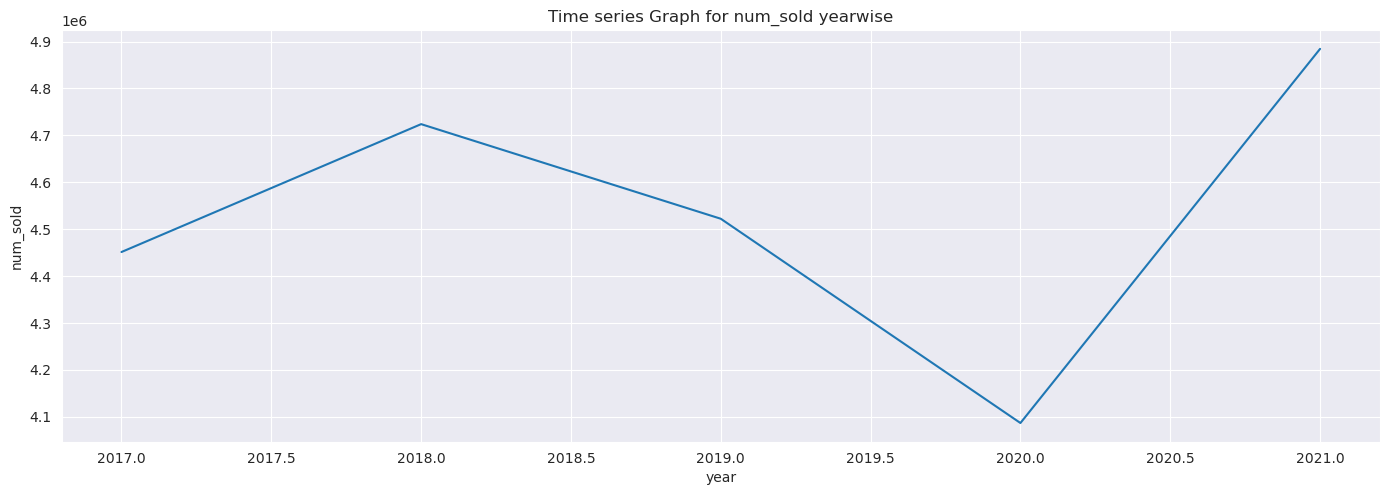

In [11]:
# plot for num_sold vs year
plt.figure(figsize=(14,5))
sns.set_style('darkgrid')
sns.lineplot(data=a,x='year',y='num_sold',markers='<')
plt.tight_layout()
plt.title('Time series Graph for num_sold yearwise')


## Num_sold per Month

In [12]:
months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
df = train.groupby('month')['num_sold'].sum().reset_index()
df['month'] = df['month'].map(months)
df

,month,num_sold
0,January,2042783
1,February,1782267
2,March,1905982
3,April,1764963
4,May,1866246
5,June,1779787
6,July,1858402
7,August,1867996
8,September,1833097
9,October,1924133


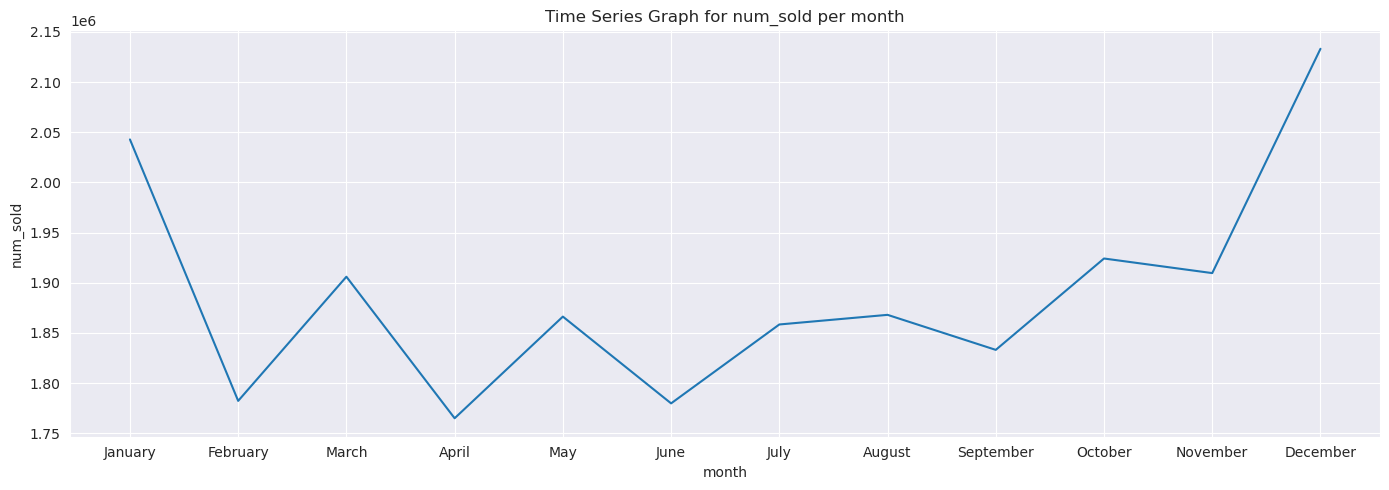

In [13]:
# plot for num_sold per month
plt.figure(figsize=(14,5))
sns.lineplot(data=df,x='month',y='num_sold')
plt.title('Time Series Graph for num_sold per month')
plt.tight_layout()

## Num_sold per Day

In [14]:
days = {1:'Tuesday',0:'Monday',3:'Thursday',2:'Wednesday',4: 'Friday',5:'Saturday',6:'Sunday'}
day = train.groupby('day_of_week')['num_sold'].sum().reset_index()
day['day_of_week'] = day['day_of_week'].map(days)
day

,day_of_week,num_sold
0,Monday,3070961
1,Tuesday,3071422
2,Wednesday,3070221
3,Thursday,3075771
4,Friday,3295128
5,Saturday,3396846
6,Sunday,3687976


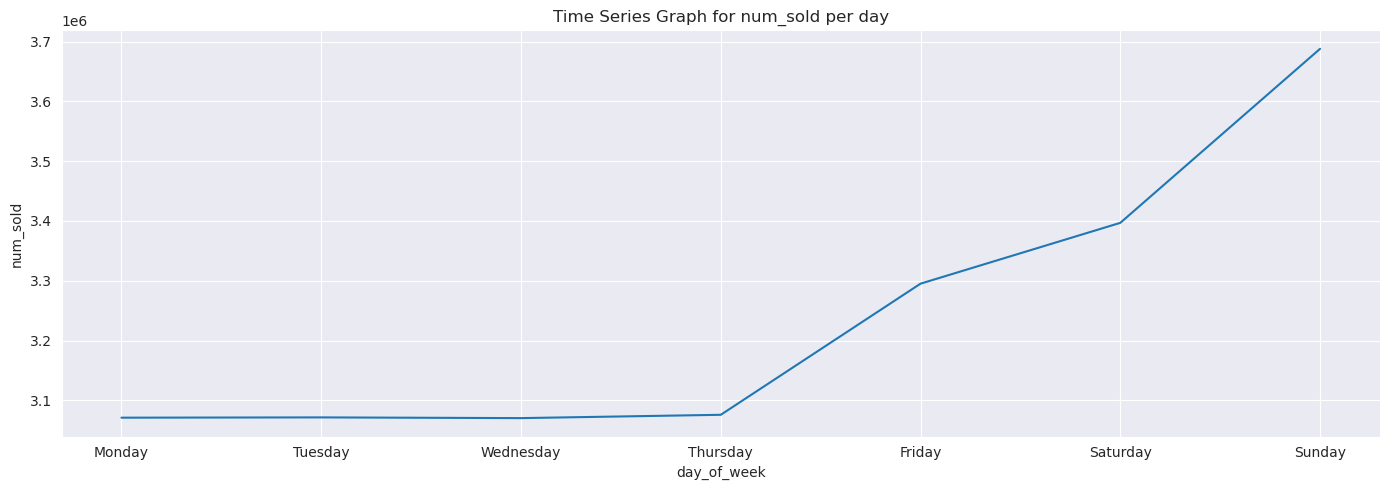

In [15]:
plt.figure(figsize=(14,5))
sns.lineplot(data=day,x='day_of_week',y='num_sold')
plt.title('Time Series Graph for num_sold per day')
plt.tight_layout()

## Num_sold per Country

In [16]:
count = train.groupby('country')['num_sold'].sum().reset_index()
count

,country,num_sold
0,Argentina,1683244
1,Canada,7013114
2,Estonia,3577319
3,Japan,6013786
4,Spain,4380862


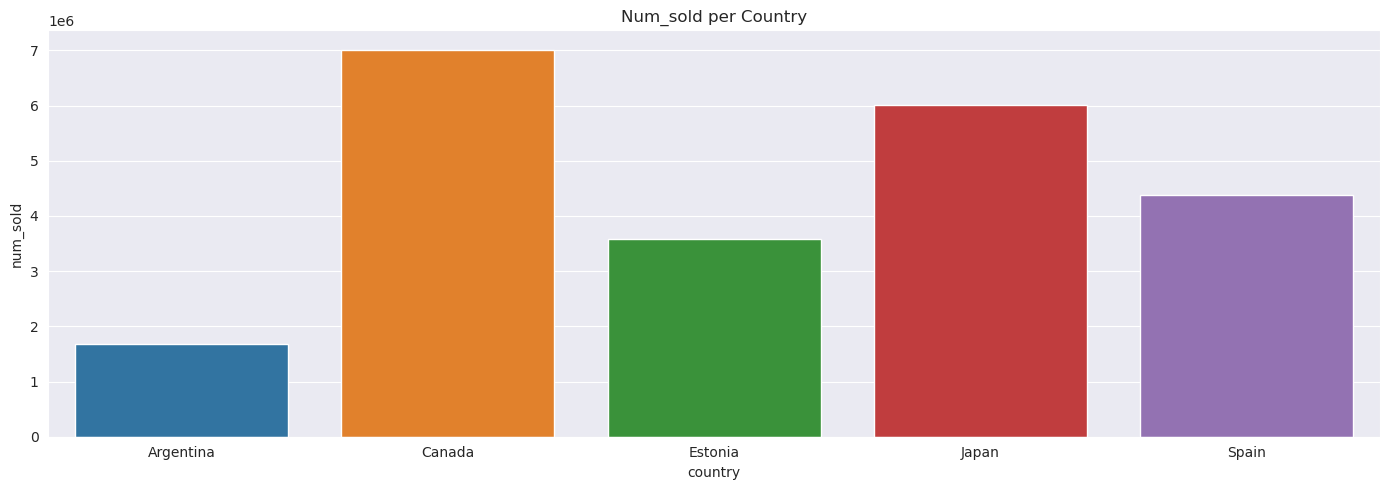

In [17]:
plt.figure(figsize=(14,5))
sns.barplot(data = count, x='country', y='num_sold')
plt.title('Num_sold per Country')
plt.tight_layout()

## Num_sold for every store

In [18]:
store = train.groupby('store')['num_sold'].sum().reset_index()
store

,store,num_sold
0,Kagglazon,15661335
1,Kaggle Learn,2755934
2,Kaggle Store,4251056


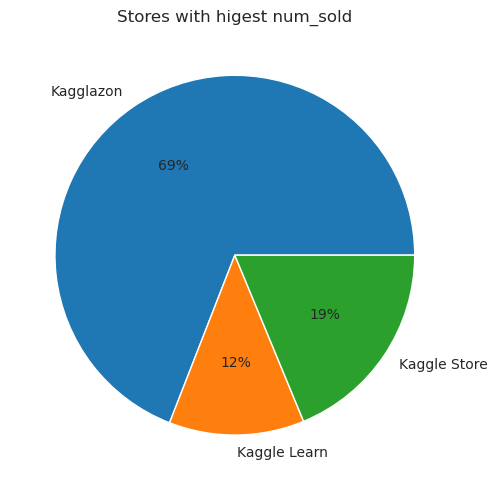

In [19]:
plt.figure(figsize=(10,5))
plt.pie(data=store,labels='store',x='num_sold',autopct='%.0f%%')
plt.title('Stores with higest num_sold')
plt.tight_layout()
plt.show()

## Num_sold per product

In [20]:
pro = train.groupby('product')['num_sold'].sum().reset_index()
pro

,product,num_sold
0,Using LLMs to Improve Your Coding,6069281
1,Using LLMs to Train More LLMs,5993975
2,Using LLMs to Win Friends and Influence People,932564
3,Using LLMs to Win More Kaggle Competitions,5068313
4,Using LLMs to Write Better,4604192


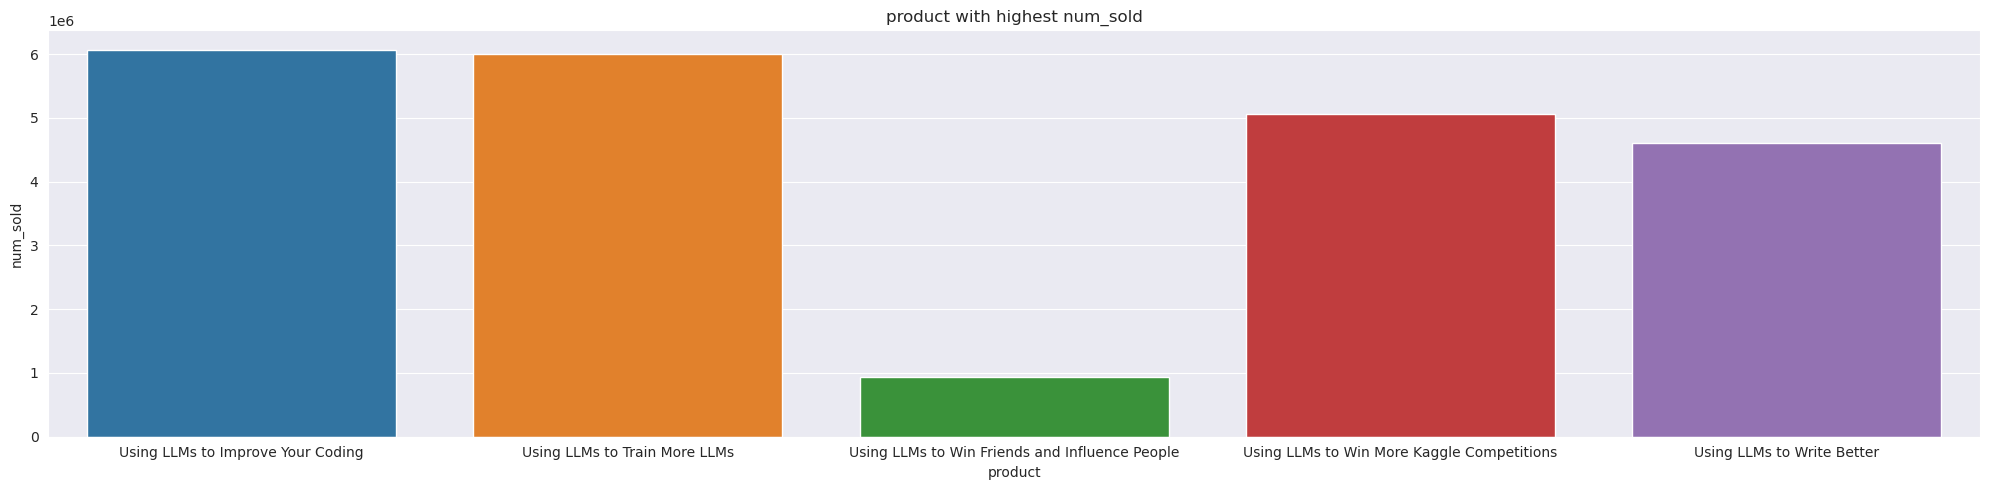

In [21]:
plt.figure(figsize=(20,5))
sns.barplot(data=pro,x='product',y='num_sold')
plt.title('product with highest num_sold')
plt.tight_layout()

# Feature Enginering

In [22]:
# Country column changes to ordinal values
for data in combine:
    list={'Argentina':1,'Canada':2,'Estonia':3,'Japan':4,'Spain':5 }
    data['country']=data['country'].map(list)

In [23]:
# Store column changes to ordinal value
for data in combine:
    list={'Kaggle Learn':1,'Kaggle Store':2,'Kagglazon':3}
    data['store']=data.store.map(list)

In [24]:
# Product changes to ordinal value
for data in combine:
    list={'Using LLMs to Improve Your Coding':1,'Using LLMs to Train More LLMs':2,'Using LLMs to Win Friends and Influence People':3,'Using LLMs to Win More Kaggle Competitions':4 ,'Using LLMs to Write Better':5}
    data['product']=data['product'].map(list)

## New features

In [25]:
# Crate weekend column, weekend = 1, weekday = 0
for df in combine:
    df['day_of_week'] = df['date'].dt.dayofweek
    df.loc[df['day_of_week'] > 4, 'weekend'] = 1
    df.loc[df['day_of_week'] <= 4, 'weekend'] = 0

In [26]:
# Create Sunday Column, Sunday = 1, others = 0
for df in combine:
    df.loc[df['day_of_week'] == 6, 'sunday'] = 1
    df.loc[df['day_of_week'] != 6, 'sunday'] = 0

In [27]:
# Create Fourier Features
for df in combine:
    df['month_sin'] = np.sin(2*np.pi*df['month']/12)
    df['month_cos'] = np.cos(2*np.pi*df['month']/12)
    df['day_sin'] = np.sin(2*np.pi*df['day']/31)
    df['day_cos'] = np.cos(2*np.pi*df['day']/31)

In [28]:
# Co-vid Feature
start_date = pd.to_datetime('2020-03-01')
end_date = pd.to_datetime('2021-01-01')

for df in combine:
    df['covid'] = df['date'].apply(lambda x: 1 if start_date <= x <= end_date else 0)

In [29]:
# Store_product feature
for data in combine:
    data['store_product'] = data['store']+ data['product']

## Holiday Feature  

In [30]:
# creating list of holidays for each country for years mentioned in data.
years = data["year"].unique().tolist()

holiday_AR = holidays.CountryHoliday("AR", years=years)
holiday_CA = holidays.CountryHoliday("CA", years=years)
holiday_EE = holidays.CountryHoliday("EE", years=years)
holiday_JP = holidays.CountryHoliday("JP", years=years)
holiday_ES = holidays.CountryHoliday("ES", years=years)

In [31]:
# Checking a date is holiday or not for each country.
df_holidays = pd.DataFrame(columns=['date', 'AR', 'CA', 'EE', 'JP', 'ES'])

for date in pd.date_range(start='2017-01-01', end='2022-12-31'):
    ar = 1 if date in holiday_AR else 0
    ca = 1 if date in holiday_CA else 0
    ee = 1 if date in holiday_EE else 0
    jp = 1 if date in holiday_JP else 0
    es = 1 if date in holiday_ES else 0

    df_holidays = df_holidays.append({"date": date, "AR": ar, "CA": ca, "EE": ee, "JP": jp, "ES": es}, ignore_index=True)

In [32]:
# New feature addition for each country
for data in combine:
    data['is_holiday_Argentina'] = data['date'].map(df_holidays.set_index('date')['AR']).astype(int)
    data['is_holiday_Canada'] = data['date'].map(df_holidays.set_index('date')['CA']).astype(int)
    data['is_holiday_Estonia'] = data['date'].map(df_holidays.set_index('date')['EE']).astype(int)
    data['is_holiday_Japan'] = data['date'].map(df_holidays.set_index('date')['JP']).astype(int)
    data['is_holiday_Spain'] = data['date'].map(df_holidays.set_index('date')['ES']).astype(int)


<Axes: >

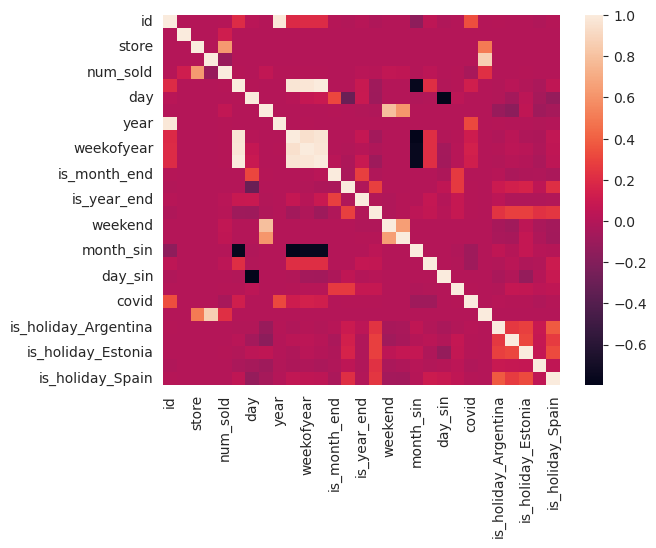

In [33]:
# correlation between features
sns.heatmap(train.corr())

In [34]:
# Droping the id and date column.
for data in combine:
    data.drop(columns=['id','date'],inplace=True)

In [35]:
# changing the data type of weekofyear column.
for data in combine:
     data['weekofyear'] = data['weekofyear'].astype(int)

In [36]:
# checking columns before staring the training
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27375 entries, 0 to 27374
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               27375 non-null  int64  
 1   store                 27375 non-null  int64  
 2   product               27375 non-null  int64  
 3   month                 27375 non-null  int64  
 4   day                   27375 non-null  int64  
 5   day_of_week           27375 non-null  int64  
 6   year                  27375 non-null  int64  
 7   quarter               27375 non-null  int64  
 8   weekofyear            27375 non-null  int64  
 9   dayofyear             27375 non-null  int64  
 10  is_month_end          27375 non-null  bool   
 11  is_month_start        27375 non-null  bool   
 12  is_year_end           27375 non-null  bool   
 13  is_year_start         27375 non-null  bool   
 14  weekend               27375 non-null  float64
 15  sunday             

# Train Test Split

In [37]:
X_train=train.drop(columns='num_sold')
y_train=train.num_sold
X_test = test

## Standard Scaling

In [38]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

## Evaluvation method 

In [39]:
def cv_score(score):
    rmse = np.sqrt(-score) # -score because we are using "neg_mean_squared_error" as our metric
    return (rmse)

# Models

## Linear Regression

In [40]:
lm = LinearRegression()

lm.fit(X_train,y_train)

pred_lm = np.round(lm.predict(X_test))

lm_score = round(lm.score(X_train,y_train)*100,2)
print(lm_score)

43.0


## Random Forest

In [41]:
rf = RandomForestRegressor()

rf.fit(X_train,y_train)

pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_train,y_train)*100, 2)
rf_score

99.9

## Gradient Boosting Regressor

In [42]:
gr_best =  {'learning_rate': 0.13119348735666758,
            'max_depth': 8.0,
            'n_estimators': 150.0}


gb = GradientBoostingRegressor(n_estimators=int(gr_best['n_estimators']),
                               max_depth=int(gr_best['max_depth']),
                               learning_rate=gr_best['learning_rate'],
                               loss='absolute_error',random_state=156)

gb.fit(X_train,y_train)

pred_gb = gb.predict(X_test)

gb_score = round(gb.score(X_train,y_train)*100, 2)

gb_score

99.37

## Ada Boost Regressor

In [43]:
ad = AdaBoostRegressor()

ad.fit(X_train,y_train)

pred_ad = ad.predict(X_test)

ad_score = round(ad.score(X_train,y_train)*100, 2)

ad_score

70.72

## XGB Regressor

In [44]:
xgb = XGBRegressor()

xgb.fit(X_train,y_train)

pred_xgb = xgb.predict(X_test)

xb_score = round(xgb.score(X_train,y_train)*100,2)

xb_score

99.42

## LGMB Regressor

In [45]:
lgbm_best = {'learning_rate': 0.13431395434407706,
             'min_child_samples': 70.0,
             'n_estimators': 200.0,
             'num_leaves': 80.0}

lgmb = LGBMRegressor(learning_rate=lgbm_best['learning_rate'],
                        min_child_samples=int(lgbm_best['min_child_samples']),
                        n_estimators=int(lgbm_best['n_estimators']),
                        num_leaves=int(lgbm_best['num_leaves']),
                        objective='mae',random_state=156)

lgmb.fit(X_train,y_train)

pred_lgb=lgmb.predict(X_test)

score_lgb=round(lgmb.score(X_train,y_train)*100, 2)

score_lgb

99.23

## Cat Boost Regressor

In [46]:
cat_best = {'bootstrap_type': 0,
            'depth': 7,
            'iterations': 745,
            'l2_leaf_reg': 3,
            'learning_rate': 0.04964042259047742}


cat = CatBoostRegressor(learning_rate=0.089075,
                            iterations=cat_best['iterations'],
                            l2_leaf_reg=cat_best['l2_leaf_reg'],
                            depth=cat_best['depth'],
                            bootstrap_type='Bayesian',
                            objective='MAE',
                            silent=True,
                            random_state=156)

cat.fit(X_train,y_train)

pred_cat = cat.predict(X_test)

score_cat = round(cat.score(X_train,y_train)*100, 2)

score_cat

99.26

# Evaluvation Table

In [47]:
modles = pd.DataFrame({'Model':['Linear Regression','Random Forest Regressor','Gradient Boosting Regressor','Ada Boost Regressor','Xgboost','LGBMRegressor',' Cat Boost Regressor'], 'score':[lm_score,rf_score,gb_score,ad_score,xb_score,score_lgb,score_cat]})
modles.sort_values(by='score',ascending=False)

,Model,score
1,Random Forest Regressor,99.90
4,Xgboost,99.42
2,Gradient Boosting Regressor,99.37
6,Cat Boost Regressor,99.26
5,LGBMRegressor,99.23
3,Ada Boost Regressor,70.72
0,Linear Regression,43.00


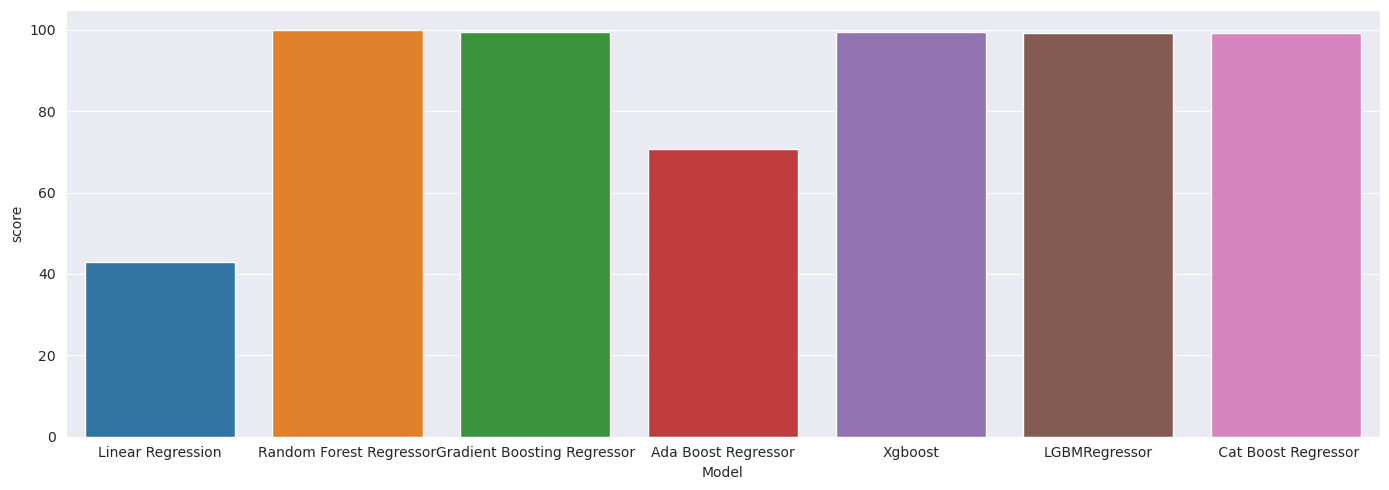

In [48]:
plt.figure(figsize=(14,5))
sns.barplot(data=modles,x='Model',y='score')
plt.tight_layout()

# Ensemble of modles

In [49]:
# Instantiate the Regressor
voting_reg = VotingRegressor(
            estimators=[('rf',rf),
                        ('cb_reg',cat),
                        ('gb',gb ),
                        ('lgm',lgmb),
                        ('cat',cat)])


In [50]:
# Calculate cross validation score for the Voting regresssor
scores = cross_val_score(voting_reg, X_train, y_train, scoring="neg_mean_squared_error")

In [51]:
# Given that we have negative MSE score, lets first get the root squares to get RMSE's and then calculate the mean
voting_reg_score = np.sqrt(-scores)

# Calc mean for RMSE
print(voting_reg_score.mean())

30.93736423404137


In [52]:
# Fitting the voting regressor on the entire training dataset
voting_reg.fit(X_train, y_train)

# Predict on test set
pred = voting_reg.predict(X_test)

In [53]:
# 'Argentina':1,'Canada':2,'Estonia':3,'Japan':4,'Spain':5
# Using diifernt sales for each country to find a frequency.
forecast_probed = pd.Series(np.round(pred), index=test.index, copy=True)
probed_map = {
    1: 3.5,
    5 : 1.5,
    4 : 1.4,
    3 : 1.7,
    2 : 0.8,
}

forecast_probed = np.round(forecast_probed * test['country'].replace(probed_map) , 0)

# Submission

In [54]:
# import submission file
submission = pd.read_csv('/kaggle/input/playground-series-s3e19/sample_submission.csv')

In [55]:
# assign predicated value
submission['num_sold'] = forecast_probed

In [56]:
submission.head()

,id,num_sold
0,136950,126.0
1,136951,126.0
2,136952,21.0
3,136953,126.0
4,136954,102.0


In [57]:
# converting to csv
submission.to_csv('submission.csv',index=False)